In [ ]:
from google.colab import drive
from tensorflow.keras.utils import *
drive.mount('/content/drive')

Mounted at /content/drive


# Constant

In [ ]:

n_x = 16
n_y = 16
num_classes = 2
split_size = 0.2


# Load data

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/vector/300K_finnal/300k_256_v1.csv")
data = data.drop("id", axis=1)
print(data)

             x_0       x_1       x_2  ...     x_254     x_255  label
0      -0.048629  0.012470  0.007325  ...  0.041314  0.029879      0
1      -0.041992  0.026825  0.013880  ...  0.052775  0.040226      0
2       0.098978 -0.331393  0.588230  ... -0.010934  0.444449      0
3      -0.054822  0.014847  0.027463  ...  0.037730  0.028305      0
4      -0.029561  0.016286 -0.011194  ...  0.089120  0.032448      0
...          ...       ...       ...  ...       ...       ...    ...
358068 -0.096017 -0.002333  0.285492  ...  0.416646  0.082489      1
358069 -0.146059 -0.070191  0.259435  ...  0.341504  0.102825      1
358070 -0.048140  0.155435  0.043301  ...  0.154161  0.017665      1
358071 -0.035542  0.099945  0.049585  ...  0.114557  0.045370      1
358072 -0.138641 -0.064867  0.297599  ...  0.279866  0.083325      1

[358073 rows x 257 columns]


# process data

In [ ]:
import numpy as np
label = data["label"].to_numpy()
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = num_classes)
feature = data.drop("label", axis=1).to_numpy()
arr = []
for i in feature:
  arr.append(np.reshape(i, (n_x, n_y)).tolist())
feature = np.array(arr)

print(label.shape, feature.shape)
print(label)

(358073, 2) (358073, 16, 16)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Split train-test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = split_size,shuffle = True)
print(y_test)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Create model

In [ ]:
pip install tensorflow-gpu 

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization

classifier = Sequential()
classifier.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
# classifier.add(LSTM(128,return_sequences=True ))
classifier.add(LSTM(172,return_sequences=True ))
classifier.add(LSTM(256,return_sequences=False ))
classifier.add(Dropout(0.2))
classifier.add(Dense(num_classes))
classifier.add(Activation('softmax'))
classifier.compile( loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'] )

# Train

In [ ]:
import time
classifier.summary()
t1 = time.time()
history = classifier.fit(x=X_train, y=y_train,batch_size=36,
                    epochs=50, validation_split = split_size, shuffle=True)
t2 = time.time()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 16, 128)           74240     
_________________________________________________________________
lstm_10 (LSTM)               (None, 16, 172)           207088    
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               439296    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 721,138
Trainable params: 721,138
Non-trainable params: 0
________________________________________________

# Test

In [ ]:
t3 = time.time()
test_loss, test_acc = classifier.evaluate(X_test, y_test)
t4 = time.time()
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2238/2238 [==============================] - 9s 4ms/step - loss: 0.0640 - accuracy: 0.9833
Test Loss: 0.06398666650056839
Test Accuracy: 0.9832996129989624


# Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

y_pred = classifier.predict(X_test)
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)



target_name = ['clean', 'malware']
print(classification_report(label_true, label_pred, target_names = target_name))


matrix = confusion_matrix(label_true, label_pred)

print(matrix)

print("\n\n")

print("\n---detail----\n")


print("---precision--- ")
print("macro : ", precision_score(label_true, label_pred, average='macro'))
print("micro : ", precision_score(label_true, label_pred, average='micro'))
print("weighted : ", precision_score(label_true, label_pred, average='weighted'))
print("each class : ", precision_score(label_true, label_pred, average=None))

print("\n---recall--- ")
print("macro : ", recall_score(label_true, label_pred, average='macro'))
print("micro : ", recall_score(label_true, label_pred, average='micro'))
print("weighted : ", recall_score(label_true, label_pred, average='weighted'))
print("each class : ", recall_score(label_true, label_pred, average=None))

print("\n---f1 score--- ")
print("macro : ", f1_score(label_true, label_pred, average='macro'))
print("micro : ", f1_score(label_true, label_pred, average='micro'))
print("weighted : ", f1_score(label_true, label_pred, average='weighted'))
print("each class : ", f1_score(label_true, label_pred, average=None))

print("\n---Acc score--- ")
print(accuracy_score(label_true, label_pred))
print("\n---FPR score--- ")
print(matrix[1][0]/(matrix[1][0]+matrix[1][1]))
print("\n---matrix--- ")
print(matrix)
print("\n---time--- ")
print("train", t2-t1)
print("test", t4-t3)


              precision    recall  f1-score   support

       clean       0.99      0.99      0.99     57625
     malware       0.96      0.95      0.96     13990

    accuracy                           0.98     71615
   macro avg       0.98      0.97      0.97     71615
weighted avg       0.98      0.98      0.98     71615

[[57110   515]
 [  681 13309]]




---detail----

---precision--- 
macro :  0.9754810536497016
micro :  0.983299588075124
weighted :  0.9832405493999984
each class :  [0.98821616 0.96274595]

---recall--- 
macro :  0.9711926399240858
micro :  0.983299588075124
weighted :  0.983299588075124
each class :  [0.99106291 0.95132237]

---f1 score--- 
macro :  0.9733187785884536
micro :  0.983299588075124
weighted :  0.9832617621265203
each class :  [0.98963749 0.95700007]

---Acc score--- 
0.983299588075124

---FPR score--- 
0.048677626876340245

---matrix--- 
[[57110   515]
 [  681 13309]]

---time--- 
train 2542.4301726818085
test 9.302461862564087


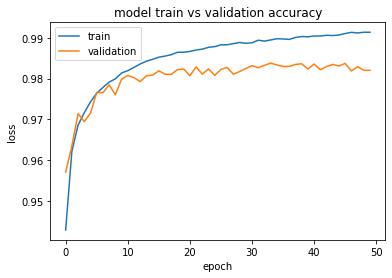

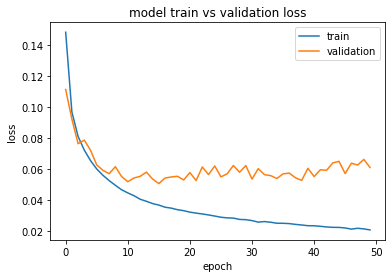

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()